In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats

In [2]:
data = pd.read_excel("19PMI_Exam_Practice_3.xlsx", names = [i for i in range(10)])

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.003142,0.044034,0.037565,0.029727,-0.013309,-0.019359,0.036209,0.040115,0.028414,0.027665
1,-0.017835,0.038435,0.049211,0.021842,-0.012905,-0.046132,0.032791,0.017431,0.013862,0.021153
2,-0.009867,0.024735,0.040216,0.014414,-0.025436,-0.056014,0.029581,0.010781,0.020719,0.027160
3,-0.012583,0.035323,0.044871,0.031925,-0.011976,-0.035852,0.045439,0.010703,0.014373,0.024159
4,-0.018371,0.037405,0.048285,0.031023,-0.018734,-0.045892,0.042383,0.021904,0.028164,0.020527


In [4]:
A = data[3]
B = data[5]

In [5]:
E_A = A.mean()
var_A = B.std()
E_B = B.mean()
var_B = B.std()

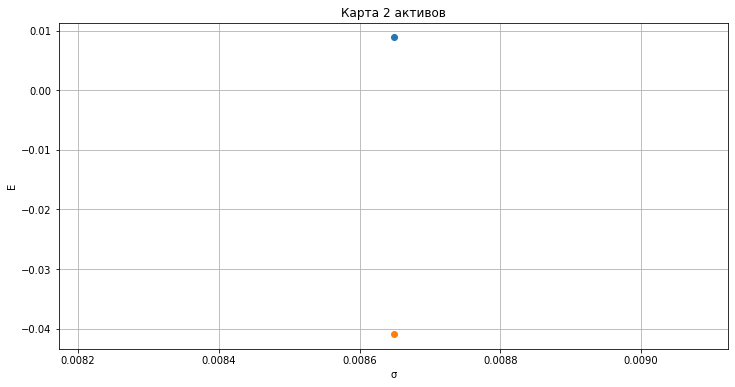

In [31]:
plt.figure(figsize=(12, 6))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта 2 активов")
plt.scatter(var_A, E_A)
plt.scatter(var_B, E_B)

plt.show()

In [25]:
profitability_ = data.drop([0,1,2,4,6,7,8,9],axis="columns")
profitability_ = profitability_.transpose()

def covarience_matrix(log_returns: pd.DataFrame) -> pd.DataFrame:
    cov_matrix = log_returns.transpose().cov()
    return cov_matrix


cov_matrix = covarience_matrix(profitability_)

from scipy.optimize import minimize

def risk_porfolio(x, cov):
  return np.sqrt(np.dot(np.dot(x, cov), x.T))
    
def risk_portfolio_max(x, cov):
  return -np.sqrt(np.dot(np.dot(x, cov), x.T))

def optimize_portfolio(mean_returns, cov_matrix, bounds, target_return=None, risk_func = risk_porfolio):
    X = np.ones(cov_matrix.shape[0])
    X = X / X.sum()
    bounds = bounds * cov_matrix.shape[0]

    constraints=[]
    constraints.append({'type': 'eq', 'fun': lambda X: np.sum(X) - 1.0})
    if target_return:
        constraints.append({'type': 'eq', 'fun': lambda X: np.dot(X, mean_returns) - target_return})
        
    out = minimize(risk_func, X, args=(cov_matrix), method='SLSQP', constraints=constraints, bounds=bounds).x
    return out

In [26]:
cov_matrix

,3,5
3,0.000094,-0.000017
5,-0.000017,0.000075


In [27]:
E = [E_A, E_B]
vars = [var_A, var_B]

bounds = ((None, None),) 
x_min_risk = optimize_portfolio(E, cov_matrix, bounds)
min_risk = risk_porfolio(x_min_risk, cov_matrix)
E_mr = np.dot(x_min_risk, E) # доходноость портфеля с минимальным риском(min risk)

means_ = np.linspace(E_mr, 0.02, 50)
p_with_short = []
for m in means_:
  x = optimize_portfolio(E, cov_matrix, bounds, m)
  risk = risk_porfolio(x, cov_matrix)
  mean = np.dot(x, E)
  p_with_short.append((risk, m))
  
front_risk, front_mean = [p[0] for p in p_with_short], [p[1] for p in p_with_short]

In [28]:
print("Портфель c минимальным риском:\n"+
      f"E - {E_mr}\n"+
      f"σ - {min_risk}")

Портфель c минимальным риском:
E - -0.013870061250545284
σ - 0.005777264491030849


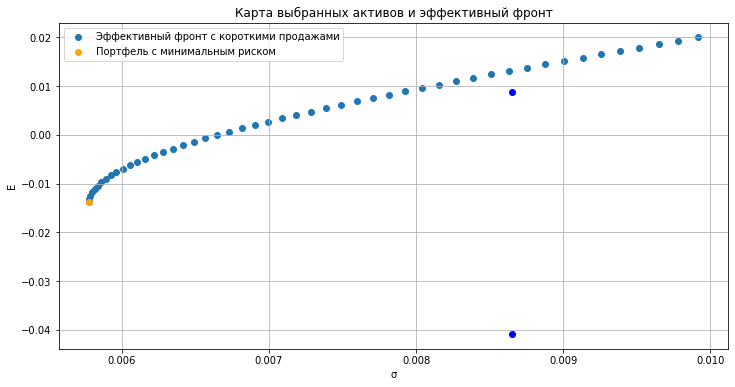

In [30]:
plt.figure(figsize=(12, 6))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта выбранных активов и эффективный фронт")

plt.scatter(front_risk, front_mean, label="Эффективный фронт c короткими продажами")
plt.scatter(vars, E, color="blue")
plt.scatter(min_risk, E_mr, c='orange', label="Портфель c минимальным риском")

plt.legend()
plt.show()